In [1]:
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from pylab import *

rcParams['font.size']=18
rcParams['figure.facecolor']='white'

from Tau_Decay_Simulator import Tau_Decay_Simulator

TDS = Tau_Decay_Simulator()

0.04943115428173577
0.0986514246502


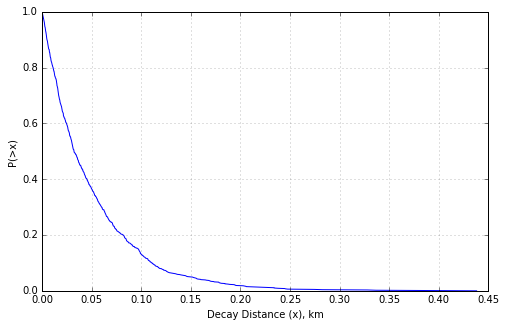

In [2]:
E_tau_eV = 1.e15
vals = TDS.sample_range(E_tau_eV, 1000)
print np.mean(vals)
u = (np.cumsum(np.ones(len(vals)))-1.) / (float(len(vals))-1.)
#hist(vals)
figure(figsize=(8,5))
plot(np.sort(vals), 1.-u)
grid(True, which='both', alpha=0.5)
xlabel('Decay Distance (x), km')
ylabel('P(>x)')

print TDS.sample_range(E_tau_eV, None)


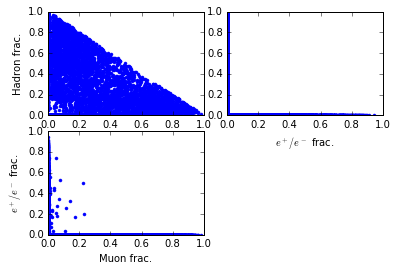

In [3]:
figure()
subplot(221)
plot(TDS.f_muon, TDS.f_hadron, '.')
ylabel('Hadron frac.')
subplot(222)
plot(TDS.f_electron, TDS.f_hadron, '.')
xlabel(r'$e^+/e^-$ frac.')
subplot(223)
plot(TDS.f_muon, TDS.f_electron, '.')
xlabel('Muon frac.')
ylabel(r'$e^+/e^-$ frac.')
subplots_adjust(hspace=0.15, wspace=0.15)

In [4]:
print 'TDS.P_shower', TDS.P_shower
print 'TDS.P_e_shower', TDS.P_e_shower
print 'TDS.P_h_shower', TDS.P_h_shower
print 'TDS.P_h_shower + TDS.P_e_shower', TDS.P_h_shower + TDS.P_e_shower

print np.sum(np.logical_or(TDS.f_hadron>0., TDS.f_electron>0.))

print np.sum(TDS.shower_cut), np.sum(TDS.e_shower_cut), np.sum(TDS.h_shower_cut), np.sum(TDS.e_shower_cut) + np.sum(TDS.h_shower_cut)


TDS.P_shower 0.8147
TDS.P_e_shower 0.23321468025
TDS.P_h_shower 0.76678531975
TDS.P_h_shower + TDS.P_e_shower 1.0
8147
8147 1900 6247 8147


0.99984
0.94371


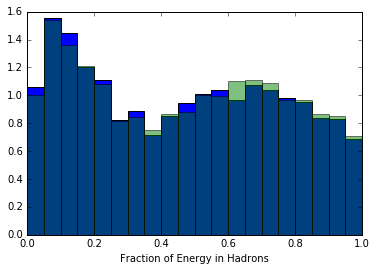

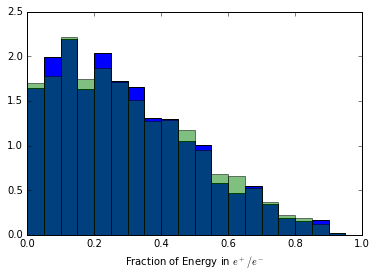

In [9]:
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

hist(f_h, normed=1, bins=np.arange(0.,1.01,0.05))
hist(TDS.f_hadron[TDS.h_shower_cut], normed=1, bins=np.arange(0.,1.01,0.05), alpha=0.5)
xlabel('Fraction of Energy in Hadrons')
figure()
hist(f_e, normed=1, bins=np.arange(0.,1.01,0.05))
hist(TDS.f_electron[TDS.e_shower_cut], normed=1, bins=np.arange(0.,1.01,0.05), alpha=0.5)
xlabel(r'Fraction of Energy in $e^+/e^-$')

print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)

[0.00000000e+00 1.60102466e-04 3.20204931e-04 ... 9.99679795e-01
 9.99839898e-01 1.00000000e+00]
[0.00000000e+00 5.26592944e-04 1.05318589e-03 ... 9.98946814e-01
 9.99473407e-01 1.00000000e+00]
0.99984
0.94371


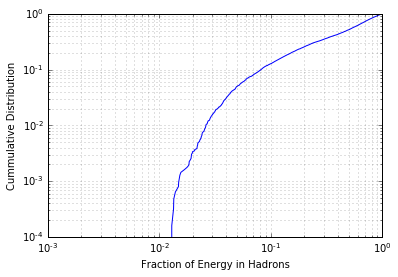

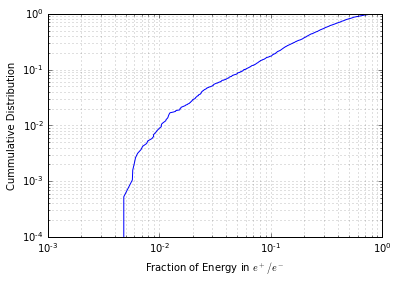

In [10]:
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
loglog(np.sort(TDS.f_hadron[TDS.h_shower_cut]), u, '-')
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

figure()
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
loglog(np.sort(TDS.f_electron[TDS.e_shower_cut]), u, '-')
xlabel(r'Fraction of Energy in $e^+/e^-$')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')

print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)

[0.00000000e+00 1.60102466e-04 3.20204931e-04 ... 9.99679795e-01
 9.99839898e-01 1.00000000e+00]
[0.00000000e+00 5.26592944e-04 1.05318589e-03 ... 9.98946814e-01
 9.99473407e-01 1.00000000e+00]
0.99984
0.94371

mean
1 0.47169956567952614
2 0.3047148082631579

std
1 0.2907924152893118
2 0.20667994770186776

skew
1 0.0622178542777
2 0.619710353322

kurtosis
1 -1.28493524851
2 -0.374838319754

median
1 0.47825
2 0.27169

MAD
1 0.26339
2 0.1512

mean log
1 -0.46245364998134386 0.34478340157060255
2 -0.6612561455171341 0.2181442924185867

std log
1 0.40432983469306605 2.537054722157594
2 0.41858227286223626 2.6216956463159966


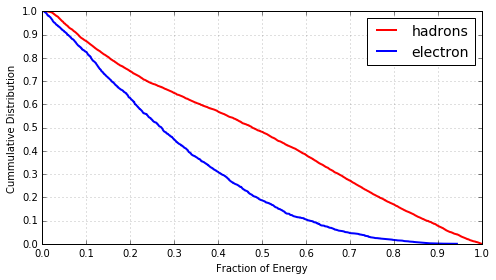

In [11]:
from scipy.stats import kurtosis
from scipy.stats import skew

figure(figsize=(7,4))
cc = 0
f_h = []
f_e = []
for k in range(0,10000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))

subplot(1,1,1)
#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
plot(np.sort(TDS.f_hadron[TDS.h_shower_cut]), 1-u, 'r-', lw=2, label='hadrons')
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

#figure()
#subplot(1,2,2)
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
plot(np.sort(TDS.f_electron[TDS.e_shower_cut]), 1-u, 'b-', lw=2, label='electron')
xlabel(r'Fraction of Energy')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
legend(loc=0, fontsize=14)
print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)
yticks(np.arange(0.,1.05, 0.1))
xticks(np.arange(0.,1.05, 0.1))

print '\nmean'
print '1', np.mean(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.mean(TDS.f_electron[TDS.e_shower_cut])

print '\nstd'
print '1', np.std(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.std(TDS.f_electron[TDS.e_shower_cut])

print '\nskew'
print '1', skew(TDS.f_hadron[TDS.h_shower_cut])
print '2', skew(TDS.f_electron[TDS.e_shower_cut])


print '\nkurtosis'
print '1', kurtosis(TDS.f_hadron[TDS.h_shower_cut])
print '2', kurtosis(TDS.f_electron[TDS.e_shower_cut])


print '\nmedian'
print '1', np.median(TDS.f_hadron[TDS.h_shower_cut])
print '2', np.median(TDS.f_electron[TDS.e_shower_cut])

print '\nMAD'
print '1', np.median(np.abs(TDS.f_hadron[TDS.h_shower_cut]-np.median(TDS.f_hadron[TDS.h_shower_cut])))
print '2', np.median(np.abs(TDS.f_electron[TDS.e_shower_cut]-np.median(TDS.f_electron[TDS.e_shower_cut])))

print '\nmean log'
print '1', np.mean(np.log10(TDS.f_hadron[TDS.h_shower_cut])),  10**np.mean(np.log10(TDS.f_hadron[TDS.h_shower_cut]))
print '2', np.mean(np.log10(TDS.f_electron[TDS.e_shower_cut])), 10**np.mean(np.log10(TDS.f_electron[TDS.e_shower_cut]))

print '\nstd log'
print '1', np.std(np.log10(TDS.f_hadron[TDS.h_shower_cut])), 10**np.std(np.log10(TDS.f_hadron[TDS.h_shower_cut]))
print '2', np.std(np.log10(TDS.f_electron[TDS.e_shower_cut])), 10**np.std(np.log10(TDS.f_electron[TDS.e_shower_cut]))

tight_layout()
savefig('frac_energy_cumu.pdf')


[0.00000000e+00 1.60102466e-04 3.20204931e-04 ... 9.99679795e-01
 9.99839898e-01 1.00000000e+00]
[  0 313 482 426 379 337 254 263 234 270 276 312 310 344 347 339 301 302
 271 266 221]
[0.00000000e+00 5.26592944e-04 1.05318589e-03 ... 9.98946814e-01
 9.99473407e-01 1.00000000e+00]
0.99984
0.94371


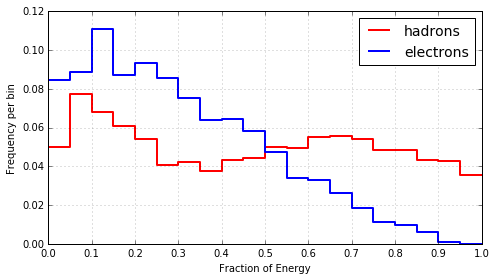

In [12]:
figure(figsize=(7,4))
cc = 0
f_h = []
f_e = []
for k in range(0,100000):
    stp = TDS.sample_shower_type() 
    cc+=stp
    if stp==0: f_h.append(TDS.sample_energy_fraction(stp))
    if stp==1: f_e.append(TDS.sample_energy_fraction(stp))
dx = 0.05
subplot(1,1,1)
#hist(np.log10(TDS.f_hadron[TDS.h_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)
u = (np.cumsum(np.ones(len(TDS.f_hadron[TDS.h_shower_cut])))-1.)/(float(len(TDS.f_hadron[TDS.h_shower_cut]))-1.)
print u
h,b = np.histogram(TDS.f_hadron[TDS.h_shower_cut], bins=np.arange(-dx, 1.+dx, dx))
plot(b[1:],h.astype(float)/np.sum(h), 'r-', lw=2, drawstyle='steps', label='hadrons')
print h
xlabel('Fraction of Energy in Hadrons')
grid(True, which='both', alpha=0.5)
ylabel('Cummulative Distribution')
#hist(np.log10(TDS.f_electron[TDS.e_shower_cut]), normed=1, bins=np.arange(-3., 0.05,0.05), alpha=0.5)

#figure()
#subplot(1,2,2)
u = (np.cumsum(np.ones(len(TDS.f_electron[TDS.e_shower_cut])))-1.)/(float(len(TDS.f_electron[TDS.e_shower_cut]))-1.)
print u
h,b = np.histogram(TDS.f_electron[TDS.e_shower_cut],  bins=np.arange(-dx, 1.+dx, dx))
plot(b[1:],h.astype(float)/np.sum(h), 'b-', lw=2, drawstyle='steps', label='electrons')

#plot(np.sort(TDS.f_electron[TDS.e_shower_cut]), 1-u, 'b-', lw=2, label='electron')
xlabel(r'Fraction of Energy')
grid(True, which='both', alpha=0.5)
ylabel('Frequency per bin')
legend(loc=0, fontsize=14)
print np.max(TDS.f_hadron)
print np.max(TDS.f_electron)
#yticks(np.arange(0.,1.05, 0.1))
xticks(np.arange(0.,1.05, 0.1))


tight_layout()
savefig('frac_energy_diff.pdf')
